In [70]:
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels.api as sm 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale 
from sklearn import model_selection
from sklearn.cross_decomposition import PLSRegression, PLSSVD
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor


In [2]:
df = pd.read_csv("Melbourne_housing_FULL.csv")
df = df.copy()


In [3]:
df.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,68 Studley St,2,h,NaN,SS,Jellis,3/09/2016,2.5,3067.0,...,1.0,1.0,126.0,NaN,NaN,Yarra City Council,-37.8014,144.9958,Northern Metropolitan,4019.0
1,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra City Council,-37.7996,144.9984,Northern Metropolitan,4019.0
2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra City Council,-37.8079,144.9934,Northern Metropolitan,4019.0
3,Abbotsford,18/659 Victoria St,3,u,NaN,VB,Rounds,4/02/2016,2.5,3067.0,...,2.0,1.0,0.0,NaN,NaN,Yarra City Council,-37.8114,145.0116,Northern Metropolitan,4019.0
4,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra City Council,-37.8093,144.9944,Northern Metropolitan,4019.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34857 entries, 0 to 34856
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         34857 non-null  object 
 1   Address        34857 non-null  object 
 2   Rooms          34857 non-null  int64  
 3   Type           34857 non-null  object 
 4   Price          27247 non-null  float64
 5   Method         34857 non-null  object 
 6   SellerG        34857 non-null  object 
 7   Date           34857 non-null  object 
 8   Distance       34856 non-null  float64
 9   Postcode       34856 non-null  float64
 10  Bedroom2       26640 non-null  float64
 11  Bathroom       26631 non-null  float64
 12  Car            26129 non-null  float64
 13  Landsize       23047 non-null  float64
 14  BuildingArea   13742 non-null  float64
 15  YearBuilt      15551 non-null  float64
 16  CouncilArea    34854 non-null  object 
 17  Lattitude      26881 non-null  float64
 18  Longti

In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Rooms,34857.0,3.031012e+00,0.969933,1.00000,2.00000,3.0000,4.000000e+00,1.600000e+01
Price,27247.0,1.050173e+06,641467.130105,85000.00000,635000.00000,870000.0000,1.295000e+06,1.120000e+07
Distance,34856.0,1.118493e+01,6.788892,0.00000,6.40000,10.3000,1.400000e+01,4.810000e+01
Postcode,34856.0,3.116063e+03,109.023903,3000.00000,3051.00000,3103.0000,3.156000e+03,3.978000e+03
Bedroom2,26640.0,3.084647e+00,0.980690,0.00000,2.00000,3.0000,4.000000e+00,3.000000e+01
Bathroom,26631.0,1.624798e+00,0.724212,0.00000,1.00000,2.0000,2.000000e+00,1.200000e+01
Car,26129.0,1.728845e+00,1.010771,0.00000,1.00000,2.0000,2.000000e+00,2.600000e+01
Landsize,23047.0,5.935990e+02,3398.841946,0.00000,224.00000,521.0000,6.700000e+02,4.330140e+05
BuildingArea,13742.0,1.602564e+02,401.267060,0.00000,102.00000,136.0000,1.880000e+02,4.451500e+04
YearBuilt,15551.0,1.965290e+03,37.328178,1196.00000,1940.00000,1970.0000,2.000000e+03,2.106000e+03


In [6]:
df.nunique()

Suburb             351
Address          34009
Rooms               12
Type                 3
Price             2871
Method               9
SellerG            388
Date                78
Distance           215
Postcode           211
Bedroom2            15
Bathroom            11
Car                 15
Landsize          1684
BuildingArea       740
YearBuilt          160
CouncilArea         33
Lattitude        13402
Longtitude       14524
Regionname           8
Propertycount      342
dtype: int64

In [7]:
df.shape

(34857, 21)

In [8]:
df.columns

Index(['Suburb', 'Address', 'Rooms', 'Type', 'Price', 'Method', 'SellerG',
       'Date', 'Distance', 'Postcode', 'Bedroom2', 'Bathroom', 'Car',
       'Landsize', 'BuildingArea', 'YearBuilt', 'CouncilArea', 'Lattitude',
       'Longtitude', 'Regionname', 'Propertycount'],
      dtype='object')

In [9]:
df.isnull().values.any()

True

In [10]:
df.isnull().sum()

Suburb               0
Address              0
Rooms                0
Type                 0
Price             7610
Method               0
SellerG              0
Date                 0
Distance             1
Postcode             1
Bedroom2          8217
Bathroom          8226
Car               8728
Landsize         11810
BuildingArea     21115
YearBuilt        19306
CouncilArea          3
Lattitude         7976
Longtitude        7976
Regionname           3
Propertycount        3
dtype: int64

In [11]:
df.fillna(df.mean(), inplace = True)

C:\Users\burak\AppData\Local\Temp\ipykernel_8892\2622515659.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.fillna(df.mean(), inplace = True)


In [12]:
df.isnull().sum()

Suburb           0
Address          0
Rooms            0
Type             0
Price            0
Method           0
SellerG          0
Date             0
Distance         0
Postcode         0
Bedroom2         0
Bathroom         0
Car              0
Landsize         0
BuildingArea     0
YearBuilt        0
CouncilArea      3
Lattitude        0
Longtitude       0
Regionname       3
Propertycount    0
dtype: int64

In [13]:
df.dtypes

Suburb            object
Address           object
Rooms              int64
Type              object
Price            float64
Method            object
SellerG           object
Date              object
Distance         float64
Postcode         float64
Bedroom2         float64
Bathroom         float64
Car              float64
Landsize         float64
BuildingArea     float64
YearBuilt        float64
CouncilArea       object
Lattitude        float64
Longtitude       float64
Regionname        object
Propertycount    float64
dtype: object

In [14]:
df.Type = pd.Categorical(df.Type)
df.Method = pd.Categorical(df.Method)
df.Regionname = pd.Categorical(df.Regionname)

In [15]:
df.dtypes

Suburb             object
Address            object
Rooms               int64
Type             category
Price             float64
Method           category
SellerG            object
Date               object
Distance          float64
Postcode          float64
Bedroom2          float64
Bathroom          float64
Car               float64
Landsize          float64
BuildingArea      float64
YearBuilt         float64
CouncilArea        object
Lattitude         float64
Longtitude        float64
Regionname       category
Propertycount     float64
dtype: object

In [16]:
kat_df = df.select_dtypes(include = ["category"])   

In [17]:
kat_df

,Type,Method,Regionname
0,h,SS,Northern Metropolitan
1,h,S,Northern Metropolitan
2,h,S,Northern Metropolitan
3,u,VB,Northern Metropolitan
4,h,SP,Northern Metropolitan
...,...,...,...
34852,h,PI,Western Metropolitan
34853,h,SP,Western Metropolitan
34854,t,S,Western Metropolitan
34855,h,SP,Western Metropolitan


In [18]:
kat_df.Type.unique()

['h', 'u', 't']
Categories (3, object): ['h', 't', 'u']

In [19]:
kat_df["Method"].value_counts()


S     19744
SP     5095
PI     4850
VB     3108
SN     1317
PN      308
SA      226
W       173
SS       36
Name: Method, dtype: int64

<AxesSubplot:>

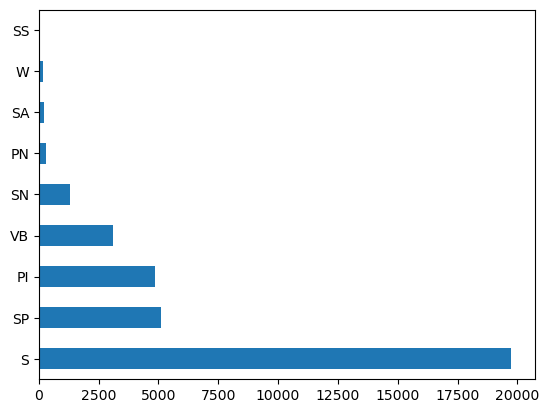

In [20]:
df["Method"].value_counts().plot.barh()

In [21]:
df_num = df.select_dtypes(include = ["float64", "int64"])

In [22]:
df_num.head()

,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
0,2,1.050173e+06,2.5,3067.0,2.0,1.0,1.0,126.0,160.2564,1965.289885,-37.8014,144.9958,4019.0
1,2,1.480000e+06,2.5,3067.0,2.0,1.0,1.0,202.0,160.2564,1965.289885,-37.7996,144.9984,4019.0
2,2,1.035000e+06,2.5,3067.0,2.0,1.0,0.0,156.0,79.0000,1900.000000,-37.8079,144.9934,4019.0
3,3,1.050173e+06,2.5,3067.0,3.0,2.0,1.0,0.0,160.2564,1965.289885,-37.8114,145.0116,4019.0
4,3,1.465000e+06,2.5,3067.0,3.0,2.0,0.0,134.0,150.0000,1900.000000,-37.8093,144.9944,4019.0


In [23]:
df_num.describe().T

,count,mean,std,min,25%,50%,75%,max
Rooms,34857.0,3.031012e+00,0.969933,1.00000,2.000000,3.000000e+00,4.000000e+00,1.600000e+01
Price,34857.0,1.050173e+06,567135.731186,85000.00000,695000.000000,1.050173e+06,1.150000e+06,1.120000e+07
Distance,34857.0,1.118493e+01,6.788795,0.00000,6.400000,1.030000e+01,1.400000e+01,4.810000e+01
Postcode,34857.0,3.116063e+03,109.022339,3000.00000,3051.000000,3.103000e+03,3.156000e+03,3.978000e+03
Bedroom2,34857.0,3.084647e+00,0.857337,0.00000,3.000000,3.000000e+00,3.084647e+00,3.000000e+01
Bathroom,34857.0,1.624798e+00,0.633013,0.00000,1.000000,1.624798e+00,2.000000e+00,1.200000e+01
Car,34857.0,1.728845e+00,0.875119,0.00000,1.000000,1.728845e+00,2.000000e+00,2.600000e+01
Landsize,34857.0,5.935990e+02,2763.694121,0.00000,357.000000,5.935990e+02,5.980000e+02,4.330140e+05
BuildingArea,34857.0,1.602564e+02,251.943934,0.00000,160.000000,1.602564e+02,1.602564e+02,4.451500e+04
YearBuilt,34857.0,1.965290e+03,24.932350,1196.00000,1965.289885,1.965290e+03,1.965290e+03,2.106000e+03


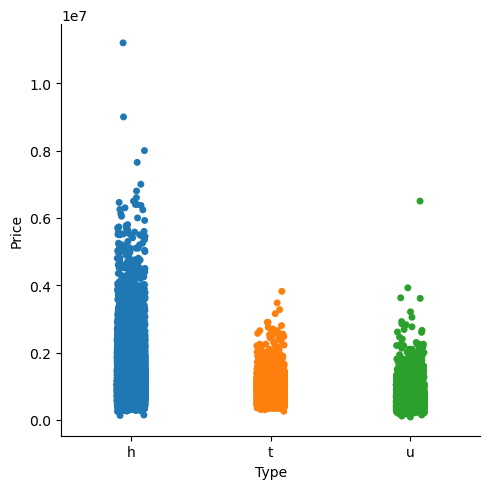

In [24]:
sns.catplot(x = "Type", y = "Price", data = df);

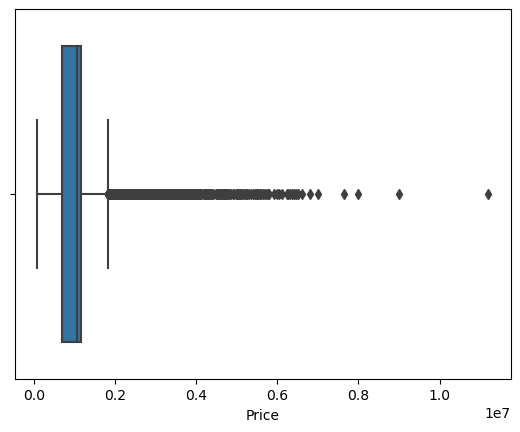

In [25]:
sns.boxplot(x = df["Price"]);

In [26]:
df.corr()

,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
Rooms,1.000000,0.404908,0.271511,0.085890,0.819099,0.529191,0.337780,0.030136,0.098468,-0.008660,0.004254,0.090140,-0.071675
Price,0.404908,1.000000,-0.186848,0.040511,0.327485,0.324631,0.154545,0.026460,0.065301,-0.200789,-0.170840,0.154873,-0.052934
Distance,0.271511,-0.186848,1.000000,0.481566,0.239091,0.111939,0.211768,0.048717,0.050110,0.220757,-0.089506,0.179113,-0.018140
Postcode,0.085890,0.040511,0.481566,1.000000,0.080398,0.108110,0.060746,0.032452,0.029252,0.063422,-0.208542,0.327576,0.017108
Bedroom2,0.819099,0.327485,0.239091,0.080398,1.000000,0.614737,0.385459,0.034578,0.110089,-0.001589,0.003431,0.105682,-0.045785
Bathroom,0.529191,0.324631,0.111939,0.108110,0.614737,1.000000,0.305530,0.034007,0.107991,0.130244,-0.058905,0.106059,-0.028168
Car,0.337780,0.154545,0.211768,0.060746,0.385459,0.305530,1.000000,0.034846,0.074810,0.095211,-0.008943,0.046613,-0.008171
Landsize,0.030136,0.026460,0.048717,0.032452,0.034578,0.034007,0.034846,1.000000,0.085636,0.010530,0.022734,-0.002323,-0.014453
BuildingArea,0.098468,0.065301,0.050110,0.029252,0.110089,0.107991,0.074810,0.085636,1.000000,0.013914,0.012526,-0.001562,-0.015003
YearBuilt,-0.008660,-0.200789,0.220757,0.063422,-0.001589,0.130244,0.095211,0.010530,0.013914,1.000000,0.069531,-0.016796,0.014550


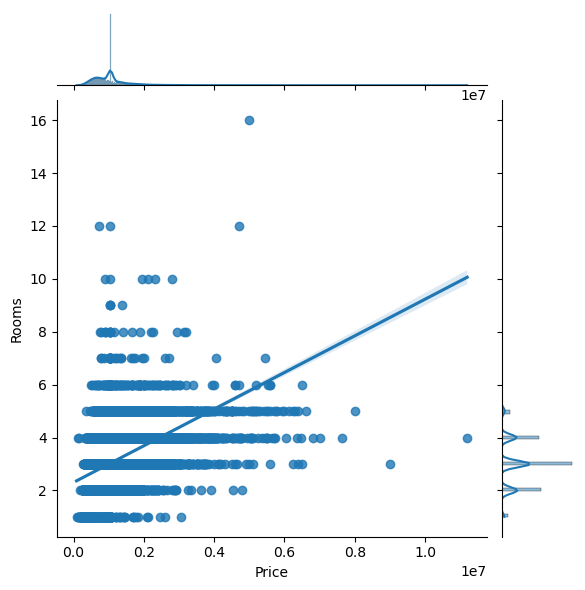

In [27]:
sns.jointplot(x = "Price", y = "Rooms", data = df, kind = "reg")

# LinearRegression

In [28]:
X = df[["Price"]]
X[0:5]

,Price
0,1.050173e+06
1,1.480000e+06
2,1.035000e+06
3,1.050173e+06
4,1.465000e+06


In [29]:
X = sm.add_constant(X)

In [30]:
y = df["Rooms"]
y[0:5]

0    2
1    2
2    2
3    3
4    3
Name: Rooms, dtype: int64

In [31]:
X = df[["Price"]]
y = df["Rooms"]
reg = LinearRegression()
model = reg.fit(X,y)
model.intercept_
model.coef_
       

array([6.92486586e-07])

In [37]:
lm = sm.OLS(y,X)

In [38]:
model = lm.fit()

In [39]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  Rooms   R-squared (uncentered):                   0.804
Model:                            OLS   Adj. R-squared (uncentered):              0.804
Method:                 Least Squares   F-statistic:                          1.430e+05
Date:                Sat, 21 Oct 2023   Prob (F-statistic):                        0.00
Time:                        23:12:40   Log-Likelihood:                         -61408.
No. Observations:               34857   AIC:                                  1.228e+05
Df Residuals:                   34856   BIC:                                  1.228e+05
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Price       2.391e-06   6.32e-09    378.151      0.000    2.38e-06     2.4e-06
==============================================================================
Omnibus:                    16253.762   Durbin-Watson:                   1.280
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           267598.424
Skew:                          -1.830   Prob(JB):                         0.00
Kurtosis:                      16.071   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [41]:
model.params

Price    0.000002
dtype: float64

In [43]:
lm = smf.ols ("Price ~ Rooms", df)
model = lm.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.164
Model:                            OLS   Adj. R-squared:                  0.164
Method:                 Least Squares   F-statistic:                     6835.
Date:                Sat, 21 Oct 2023   Prob (F-statistic):               0.00
Time:                        23:13:56   Log-Likelihood:            -5.0814e+05
No. Observations:               34857   AIC:                         1.016e+06
Df Residuals:                   34855   BIC:                         1.016e+06
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   3.326e+05   9113.513     36.491      0.000    3.15e+05     3.5e+05
Rooms       2.368e+05   2863.708     82.675      0.000    2.31e+05    2.42e+05
==============================================================================
Omnibus:                    23543.860   Durbin-Watson:                   1.500
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           594682.835
Skew:                           2.898   Prob(JB):                         0.00
Kurtosis:                      22.387   Cond. No.                         11.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [45]:
from sklearn.metrics import mean_squared_error
lm = smf.ols("Price ~ Rooms",df)
model = lm.fit()

In [46]:
mse = mean_squared_error(y, model.fittedvalues)

In [47]:
mse

1155589322302.1072

In [48]:
rmse = np.sqrt(mse)

In [49]:
rmse

1074983.4055938292

In [50]:
reg.predict(X)[0:10]

array([3.03101242, 3.32866162, 3.02050508, 3.03101242, 3.31827432,
       2.89239507, 3.41176001, 3.03101242, 3.03101242, 3.03101242])

#  Ridge Regresyon

In [52]:
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size=0.25, 
                                                    random_state=42)

print("X_train", X_train.shape)

print("y_train",y_train.shape)

print("X_test",X_test.shape)

print("y_test",y_test.shape)

training = df.copy()

print("training", training.shape)

X_train (26142, 1)
y_train (26142,)
X_test (8715, 1)
y_test (8715,)
training (34857, 21)


In [53]:
ridge_model = Ridge(alpha = 0.1).fit(X_train, y_train)

In [54]:
ridge_model

Ridge(alpha=0.1)

In [55]:
10**np.linspace(10,-2,100)*0.5

array([5.00000000e+09, 3.78231664e+09, 2.86118383e+09, 2.16438064e+09,
       1.63727458e+09, 1.23853818e+09, 9.36908711e+08, 7.08737081e+08,
       5.36133611e+08, 4.05565415e+08, 3.06795364e+08, 2.32079442e+08,
       1.75559587e+08, 1.32804389e+08, 1.00461650e+08, 7.59955541e+07,
       5.74878498e+07, 4.34874501e+07, 3.28966612e+07, 2.48851178e+07,
       1.88246790e+07, 1.42401793e+07, 1.07721735e+07, 8.14875417e+06,
       6.16423370e+06, 4.66301673e+06, 3.52740116e+06, 2.66834962e+06,
       2.01850863e+06, 1.52692775e+06, 1.15506485e+06, 8.73764200e+05,
       6.60970574e+05, 5.00000000e+05, 3.78231664e+05, 2.86118383e+05,
       2.16438064e+05, 1.63727458e+05, 1.23853818e+05, 9.36908711e+04,
       7.08737081e+04, 5.36133611e+04, 4.05565415e+04, 3.06795364e+04,
       2.32079442e+04, 1.75559587e+04, 1.32804389e+04, 1.00461650e+04,
       7.59955541e+03, 5.74878498e+03, 4.34874501e+03, 3.28966612e+03,
       2.48851178e+03, 1.88246790e+03, 1.42401793e+03, 1.07721735e+03,
      

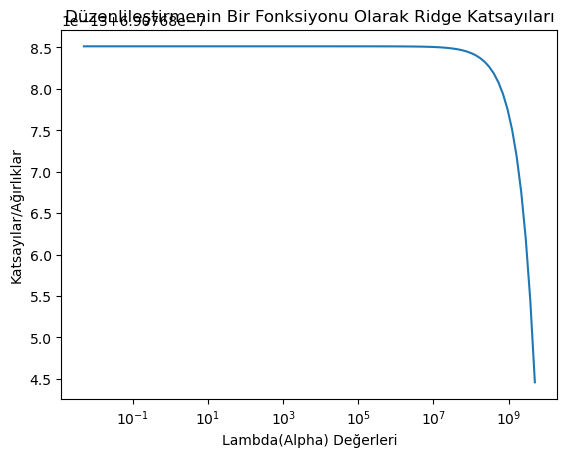

In [56]:
lambdalar = 10**np.linspace(10,-2,100)*0.5 

ridge_model = Ridge()
katsayilar = []

for i in lambdalar:
    ridge_model.set_params(alpha = i)
    ridge_model.fit(X_train, y_train) 
    katsayilar.append(ridge_model.coef_) 
    

    
ax = plt.gca()
ax.plot(lambdalar, katsayilar) 
ax.set_xscale('log') 

plt.xlabel('Lambda(Alpha) Değerleri')
plt.ylabel('Katsayılar/Ağırlıklar')
plt.title('Düzenlileştirmenin Bir Fonksiyonu Olarak Ridge Katsayıları');

In [57]:
y_pred  = ridge_model.predict(X_test)

In [58]:
np.sqrt(mean_squared_error(y_test, y_pred))

0.8806967402007959

In [60]:
rf_model = RandomForestRegressor(random_state = 42)

In [61]:
rf_model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [62]:
rf_model.predict(X_test)[0:5]

array([3.05248755, 2.03018651, 2.9616923 , 3.01620095, 3.31236485])

In [65]:
np.sqrt(mean_squared_error(y_test, y_pred))

0.8806967402007959

# Lasso

In [73]:
lasso_model = Lasso(alpha = 0.1).fit(X_train, y_train)

In [74]:
lasso_model

Lasso(alpha=0.1)

In [75]:
lasso_model.coef_

array([6.90768544e-07])

Text(0, 0.5, 'weights')

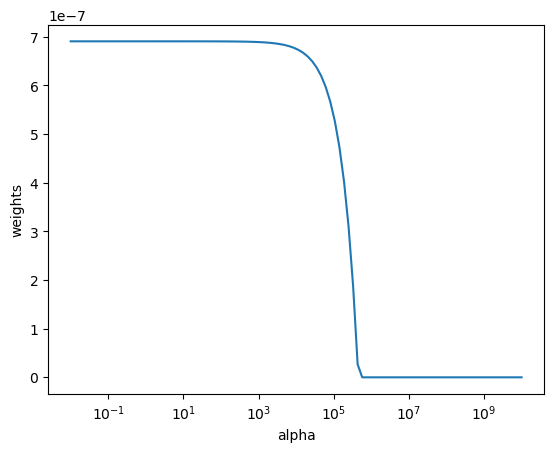

In [76]:
lasso = Lasso()
lambdalar = 10**np.linspace(10,-2,100)*0.5 
katsayilar = []

for i in lambdalar:
    lasso.set_params(alpha=i)
    lasso.fit(X_train, y_train)
    katsayilar.append(lasso.coef_)
    
ax = plt.gca()
ax.plot(lambdalar*2, katsayilar)
ax.set_xscale('log')
plt.axis('tight')
plt.xlabel('alpha')
plt.ylabel('weights')

In [77]:
lasso_model.predict(X_test)

array([2.9649646 , 2.58918651, 2.90970312, ..., 3.38287957, 3.03070735,
       2.80954168])

In [79]:
y_pred = lasso_model.predict(X_test)





In [80]:
np.sqrt(mean_squared_error(y_test, y_pred))

0.8806967409684967